# Loss Function and Regularization
Coded by Kathryn Brusewitz

In [2]:
# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)
import scipy.stats as st

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)
import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy.stats import linregress

from matplotlib.colors import ListedColormap
from sklearn import neighbors

import seaborn as sns
sns.set(style="ticks")

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error

Numpy version:        1.13.3
SciPy version:        0.19.1
Pandas version:       0.20.3
Maplotlib version:     2.1.0
Scikit-Learn version: 0.19.1


/Users/kathryn/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/kathryn/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1 Linear Regression

## 1.1 Plot the data

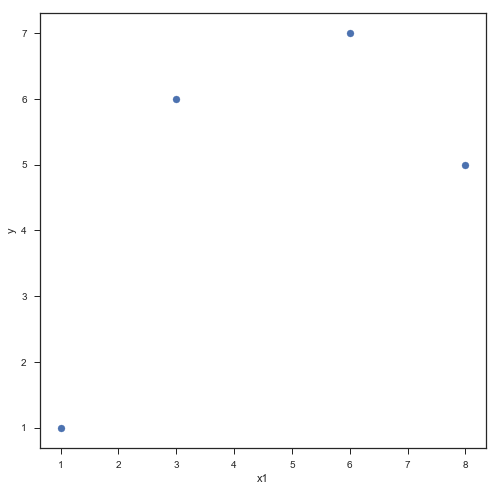

In [3]:
df = pd.DataFrame(columns=['x1', 'x2', 'y'])
df['x1'] = np.array([1.00, 3.00, 6.00, 8.00])
df['x2'] = np.array([1.00, 3.00, 6.00, 8.00]) ** 2
df['y'] = np.array([1.00, 6.00, 7.00, 5.00])

# Plot with x1 and y
plt.figure(figsize = (8, 8))
plt.scatter(df['x1'], df['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.show()


## 1.2 Linear Regression

### Regression Model A
- x1 coefficient: 0.9182
- x1 t-value: 3.903

In [4]:
lmA = sm.OLS(df['y'], df['x1'])
modelA = lmA.fit()

modelA.summary()

/Users/kathryn/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     15.23
Date:                Wed, 21 Feb 2018   Prob (F-statistic):             0.0299
Time:                        21:40:25   Log-Likelihood:                -8.7130
No. Observations:                   4   AIC:                             19.43
Df Residuals:                       3   BIC:                             18.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9182      0.235      3.903      0.030       0.169       1.667
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.522
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.274
Skew:                          -0.216   Prob(JB):                        0.872
Kurtosis:                       1.792   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression Model B
- x1 coefficient: 2.5769
- x1 t-value: 6.005
- x2 coefficient: -0.2413
- x2 t-value: -3.968

In [5]:
# Fitting a regression model with more than one variable
X = df[['x1', 'x2']]
y = df['y']

lmB = sm.OLS(y, X)
modelB = lmB.fit()

modelB.summary()

/Users/kathryn/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     52.92
Date:                Wed, 21 Feb 2018   Prob (F-statistic):             0.0185
Time:                        21:40:26   Log-Likelihood:                -4.3473
No. Observations:                   4   AIC:                             12.69
Df Residuals:                       2   BIC:                             11.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5769      0.429      6.005      0.027       0.731       4.423
x2            -0.2413      0.061     -3.968      0.058      -0.503       0.020
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.632
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.606
Skew:                          -0.829   Prob(JB):                        0.739
Kurtosis:                       2.058   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comments

In Model A, when x1 increases by 1, y will increase by 0.92.

In Model B, when x1 increases by 1, y will increase by 2.58. When x2 increases by 1, y will decrease by -0.24.

In both models, x1 is statistically significant in predicting y (p-value is less than 0.05). x2 is not (p-value is greater than 0.05).

Model B has a higher R-squared value (0.981) than that of Model A (0.835). Meaning, Model B explains 98.1% of the variance in our dependent variable.

Therefore, Model B is a more reasonable choice.

# 2 Loss Function

## 2.1 Plot the loss function

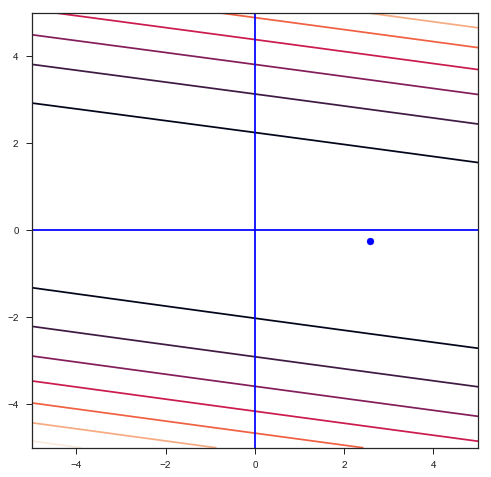

In [16]:
# Define grid
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Define loss function
def SSE(b1, b2):
    y_pred = b1*df['x1'] + b2*df['x2']
    return ((df['y'] - y_pred)**2).sum()

# Initialize z axis
zz = np.empty_like(xx)

# Compute loss function at each point
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i,j] = SSE(xx[i,j], yy[i,j])

# Contour plot
plt.figure(figsize = (8, 8))
plt.contour(xx, yy, zz)

# b1 = 0 and b2 = 0 lines
plt.axvline(x=0, color="blue")
plt.axhline(y=0, color="blue")

# Mark location of optimum b1 and b2
plt.scatter(modelB.params[0], modelB.params[1], color="blue")
plt.show()

# L1 regularization

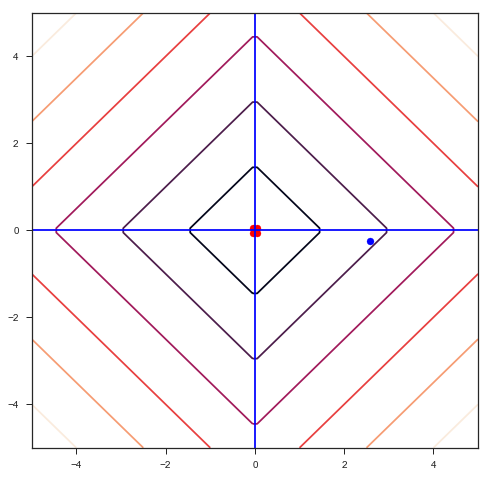

In [18]:
# Define L1 regularization function
def L1(b1, b2):
    return abs(b1) + abs(b2)

# Initialize z axis
zL1 = np.empty_like(xx)

# Compute L1 function at each point
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zL1[i,j] = L1(xx[i,j], yy[i,j])

# Contour plot
plt.figure(figsize = (8, 8))
plt.contour(xx, yy, zL1)

# b1 = 0 and b2 = 0 lines
plt.axvline(x=0, color="blue")
plt.axhline(y=0, color="blue")

# Mark location of optimum b1 and b2
plt.scatter(modelB.params[0], modelB.params[1], c="blue")

# Mark location of smallest penalty value
plt.scatter(xx[np.where(zL1==zL1.min())], yy[np.where(zL1==zL1.min())], color="red")
plt.show()

# Lasso regression

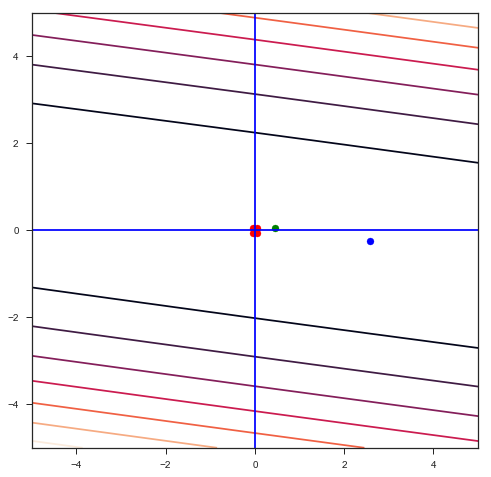

In [20]:
# Define Lasso regression function
def lasso(b1, b2, lam):
    return SSE(b1, b2) + (lam * L1(b1, b2))

# Initialize z axis
z4 = np.empty_like(xx)

# Compute Lasso function at each point
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        z4[i,j] = lasso(xx[i,j], yy[i,j], 20)

# Contour plot
plt.figure(figsize = (8, 8))
plt.contour(xx, yy, z4)

# b1 = 0 and b2 = 0 lines
plt.axvline(x=0, color="blue")
plt.axhline(y=0, color="blue")

# Mark location of optimum b1 and b2 (original unregularized optimum)
plt.scatter(modelB.params[0], modelB.params[1], c="blue")

# Mark location of smallest penalty value
plt.scatter(xx[np.where(zL1==zL1.min())], yy[np.where(zL1==zL1.min())], color="red")

# Mark location of smallest penalty value from lasso regression
plt.scatter(xx[np.where(z4==z4.min())], yy[np.where(z4==z4.min())], color="green")
plt.show()

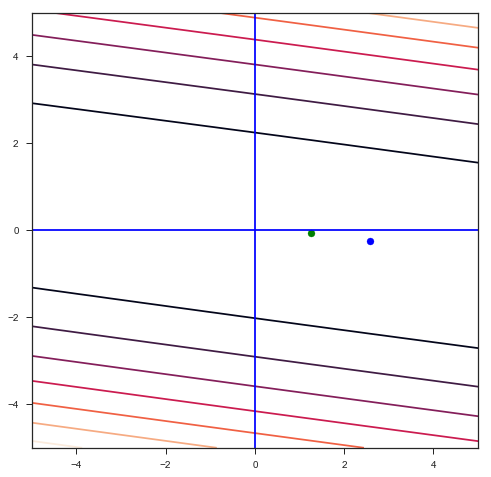

In [21]:
# Initialize z axis
z4 = np.empty_like(xx)

# Compute Lasso function at each point
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        z4[i,j] = lasso(xx[i,j], yy[i,j], 10)

# Contour plot
plt.figure(figsize = (8, 8))
plt.contour(xx, yy, z4)

# b1 = 0 and b2 = 0 lines
plt.axvline(x=0, color="blue")
plt.axhline(y=0, color="blue")

# Mark location of optimum b1 and b2
plt.scatter(modelB.params[0], modelB.params[1], c="blue")

# Mark location of smallest penalty value from lasso regression
plt.scatter(xx[np.where(z4==z4.min())], yy[np.where(z4==z4.min())], color="green")
plt.show()

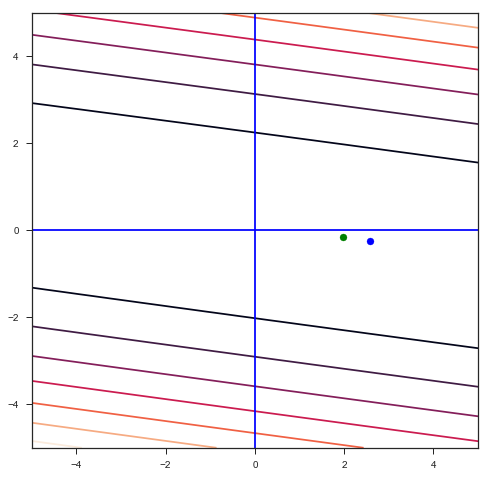

In [27]:
# Initialize z axis
z4 = np.empty_like(xx)

# Compute Lasso function at each point
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        z4[i,j] = lasso(xx[i,j], yy[i,j], 3)

# Contour plot
plt.figure(figsize = (8, 8))
plt.contour(xx, yy, z4)

# b1 = 0 and b2 = 0 lines
plt.axvline(x=0, color="blue")
plt.axhline(y=0, color="blue")

# Mark location of optimum b1 and b2
plt.scatter(modelB.params[0], modelB.params[1], c="blue")

# Mark location of smallest penalty value from lasso regression
plt.scatter(xx[np.where(z4==z4.min())], yy[np.where(z4==z4.min())], color="green")
plt.show()

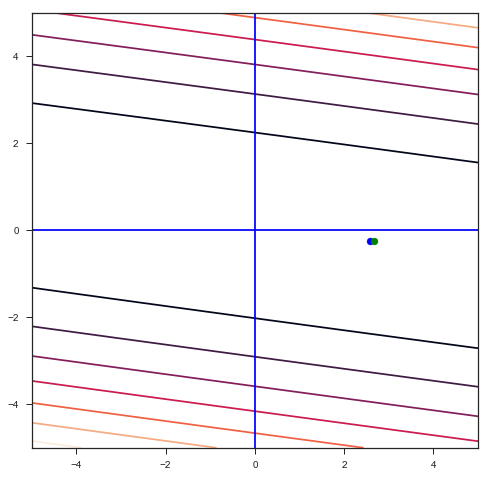

In [26]:
# Initialize z axis
z4 = np.empty_like(xx)

# Compute Lasso function at each point
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        z4[i,j] = lasso(xx[i,j], yy[i,j], 2)

# Contour plot
plt.figure(figsize = (8, 8))
plt.contour(xx, yy, z4)

# b1 = 0 and b2 = 0 lines
plt.axvline(x=0, color="blue")
plt.axhline(y=0, color="blue")

# Mark location of optimum b1 and b2
plt.scatter(modelB.params[0], modelB.params[1], c="blue")

# Mark location of smallest penalty value from lasso regression
plt.scatter(xx[np.where(z4==z4.min())], yy[np.where(z4==z4.min())], color="green")
plt.show()

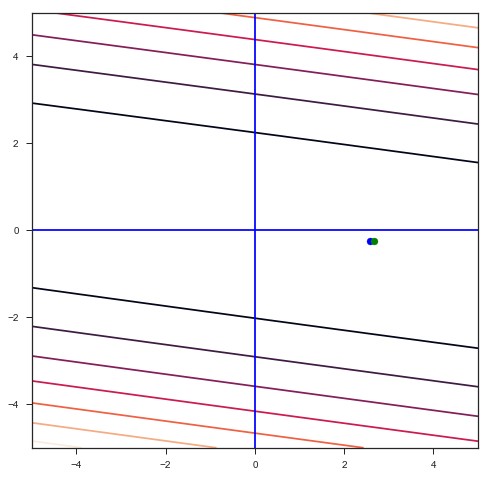

In [30]:
# Initialize z axis
z4 = np.empty_like(xx)

# Compute Lasso function at each point
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        z4[i,j] = lasso(xx[i,j], yy[i,j], 2.6)

# Contour plot
plt.figure(figsize = (8, 8))
plt.contour(xx, yy, z4)

# b1 = 0 and b2 = 0 lines
plt.axvline(x=0, color="blue")
plt.axhline(y=0, color="blue")

# Mark location of optimum b1 and b2
plt.scatter(modelB.params[0], modelB.params[1], c="blue")

# Mark location of smallest penalty value from lasso regression
plt.scatter(xx[np.where(z4==z4.min())], yy[np.where(z4==z4.min())], color="green")
plt.show()